# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [20]:
%matplotlib inline
# import numpy and pandas
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [21]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [22]:
# Your code here:

fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [23]:
# Your code here:
import re

def getNums(value):
    num_float = float(re.search("\d*\.\d*|\d+", value)[0])
    if value.endswith("M"):
        num_float=num_float*1000000
    if value.endswith("k"):
        num_float=num_float*1000
    return int(num_float)

fifa['ValueNumeric'] = fifa['Value'].apply(getNums)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [24]:
# Your code here:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [25]:
formula = 'ValueNumeric ~ C(Position) + C(fifa["Preferred Foot"])'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Position),1.705474e+16,26.0,20.799346,4.596796e-96
"C(fifa[""Preferred Foot""])",2.264309e+14,1.0,7.179823,7.379461e-03
Residual,5.714211e+17,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

Teniendo en cuenta los Pvalues de cada categoría, observamos que:
    
    - La posición que ocupa el jugador en el campo es mucho más determinante para el valor de mercado que si el jugador es diestro o zurdo, algo que a su vez también influye.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [26]:
# Your code here:

formula = 'ValueNumeric ~ C(Nationality)'
model = ols(formula=formula, data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ='II')
anova_table


,sum_sq,df,F,PR(>F)
C(Nationality),3.405648e+16,163.0,6.794386,5.962069e-135
Residual,5.548437e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

De acuerdo con el Test ANOVA, observamos que la nacionalidad es un factor a tener en cuenta en el precio de mercado del jugador (las medias difieren y rechazamos la hipótesis nula).

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [27]:
# Your code here:

fifa = fifa.dropna()
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [32]:
# Your code here:

Y = fifa['ValueNumeric']
X = sm.add_constant(fifa[['Stamina','SprintSpeed']])

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     441.9
Date:                Thu, 18 Jul 2019   Prob (F-statistic):          4.55e-188
Time:                        22:03:34   Log-Likelihood:            -3.0381e+05
No. Observations:               17918   AIC:                         6.076e+05
Df Residuals:                   17915   BIC:                         6.076e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.354e+06      2e+05    -16.748      0.000   -3.75e+06   -2.96e+06
Stamina      6.095e+04   3347.474     18.207      0.000    5.44e+04    6.75e+04
SprintSpeed  2.602e+04   3627.485      7.173      0.000    1.89e+04    3.31e+04
==============================================================================
Omnibus:                    22366.944   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4174506.717
Skew:                           6.800   Prob(JB):                         0.00
Kurtosis:                      76.529   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

* El r-squared demuestra que el modelo lineal es muy bajo para determinar el precio del jugador.
* Prob-Fstatistics siendo prácticamente 0 hace que se rechaze la hipótesis nula, observando un grado alto de dependencia entre las dos variables

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [34]:
# Your code here:


Y = fifa['ValueNumeric']
X = sm.add_constant(fifa[['Potential']])

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9197.
Date:                Thu, 18 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:06:19   Log-Likelihood:            -3.0053e+05
No. Observations:               17918   AIC:                         6.011e+05
Df Residuals:                   17916   BIC:                         6.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.654e+07   4.05e+05    -90.161      0.000   -3.73e+07   -3.57e+07
Potential   5.428e+05   5660.331     95.901      0.000    5.32e+05    5.54e+05
==============================================================================
Omnibus:                    22512.343   Durbin-Watson:                   0.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5686891.069
Skew:                           6.744   Prob(JB):                         0.00
Kurtosis:                      89.228   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

* Conociendo el rsquared, sabemos que el módelo es capaz de predecir un 34% de los datos demostrados.
* La prob. FTest es 0, por lo que rechazamos la hipótesis nula: la medias son diferentes entre sí.



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'Value')

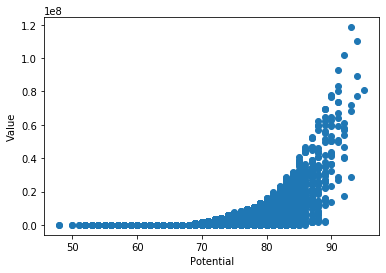

In [39]:
# Your code here:

plt.scatter(fifa['Potential'], fifa['ValueNumeric'])
plt.xlabel('Potential')
plt.ylabel('Value')

* No se aprecia relación lineal, sino exponencial entre los datos explotados.